In [1]:
from pyfmi import load_fmu
from pyfmi.fmi_coupled import CoupledFMUModelME2

In [2]:
# Load CYME FMU
cyme = load_fmu('cyme/simulator.fmu', log_level=7)
cyme.setup_experiment(start_time=0, stop_time=20)

In [3]:
# Load PV
P_A = 750 * 4  # m2
pv = load_fmu('pv/pv.fmu', log_level=7)
ref = pv.get_variable_valueref("filNam")
pv.set_string([ref],
              [bytes('pv/' + 'USA_CA_San.Francisco.Intl.AP.724940_TMY3.mos')])
pv.setup_experiment(start_time=0, stop_time=20)
pv.set("A_PV", P_A)  # m2
pv.set("azi", 180)

# Load inverter
P_max = P_A * 1000 * 0.12 / 1000
S_max = P_max + 0.05 * P_max
control = load_fmu('inverter/controls.fmu', log_level=7)
control.setup_experiment(start_time=0, stop_time=20)
control.set("QMaxCap", 0.3 * S_max)
control.set("QMaxInd", 0.3 * S_max)
control.set("thr", 0.07)
control.set("hys", 0.033)

# Works

In [4]:
# Connect FMUs and create Master
models = [("cyme", cyme), ("pv", pv), ("control", control)]
connections = []
master = CoupledFMUModelME2(models, connections)
options = master.simulate_options()
options['ncp'] = 20

# Launch simulation
results = master.simulate(options=options, final_time=20.0)
cyme.terminate()
pv.terminate()
control.terminate()

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 7
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 3
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 0.0001

Simulation interval    : 0.0 - 20.0 seconds.
Elapsed simulation time: 0.753698670495 seconds.


# Crash Python

In [ ]:
# Connect FMUs and create Master
models = [("cyme", cyme), ("pv", pv), ("control", control)]
connections = [(pv, "PV_generation", cyme, "IEEE34NODES_836_KW")
               (control, "QCon", cyme, "IEEE34NODES_836_KVAR"),
               (cyme, "voltage_836_Vpu", control, "v")]
master = CoupledFMUModelME2(models, connections)
options = master.simulate_options()
options['ncp'] = 20

# Launch simulation
results = master.simulate(options=options, final_time=20.0)
cyme.terminate()
pv.terminate()
control.terminate()

# Crash Python

In [ ]:
# Connect FMUs and create Master
models = [("cyme", cyme), ("pv", pv), ("control", control)]
connections = [(pv, "PV_generation", cyme, "IEEE34NODES_836_KW")]
#                (control, "QCon", cyme, "IEEE34NODES_836_KVAR"),
#                (cyme, "voltage_836_Vpu", control, "v")]
master = CoupledFMUModelME2(models, connections)
options = master.simulate_options()
options['ncp'] = 20

# Launch simulation
results = master.simulate(options=options, final_time=20.0)
cyme.terminate()
pv.terminate()
control.terminate()

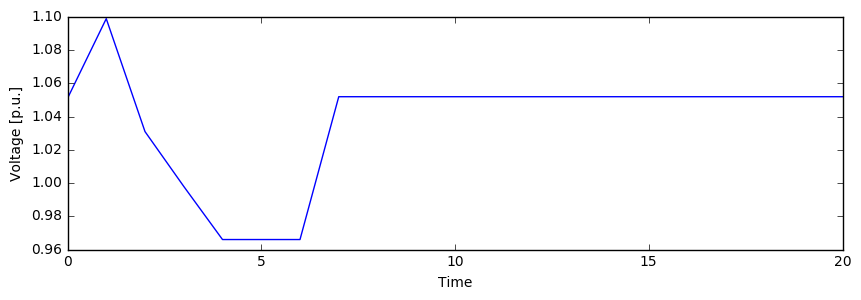

In [5]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 3))
plt.plot(results["time"], results["cyme.voltage_836_Vpu"])
plt.ylabel("Voltage [p.u.]")
plt.xlabel("Time")
plt.show()